In [1]:
# importing libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

# Setting color palatte
colors = ['#373F51','#DAA49A','#58A4B0','#D8DBE2']
sns.set_palette(colors)

plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize'] = [6, 5]

In [2]:
# reading data 
train_data = pd.read_csv("train.csv")

# view first five rows
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# shape of the data
print("Number of instances  ::", train_data.shape[0])
print("Number of attributes ::", train_data.shape[1])

Number of instances  :: 614
Number of attributes :: 13


In [4]:
# Columns names.
column_list = train_data.columns.tolist()
print("List of columns:: ", column_list)

List of columns::  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [5]:
# Clean up the column names.

# Rename the columns
rename_col = {
    'ApplicantIncome':'applicant_income',
    'CoapplicantIncome':'coapplicant_income',
    'LoanAmount':'loan_amount'
}

train_data.rename(columns=rename_col, inplace=True)
train_data.rename(columns={col:col.lower() for col in column_list}, inplace=True)        

In [6]:
# view
train_data.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Check if there is any duplicate records present in the data
train_data.duplicated().sum()

0

In [8]:
# Check the datatypes.
train_data.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount           float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [9]:
# Check the unique values in categorical data.
categorical_cols = ['gender', 
                    'married', 
                    'dependents', 
                    'education', 
                    'self_employed', 
                    'credit_history', 
                    'property_area', 
                    'loan_status'
                    ]

for col in categorical_cols:
    print(f"{col.upper()} :: {train_data[col].unique()}")
    print(train_data[col].value_counts())
    print("---"*10)

GENDER :: ['Male' 'Female' nan]
Male      489
Female    112
Name: gender, dtype: int64
------------------------------
MARRIED :: ['No' 'Yes' nan]
Yes    398
No     213
Name: married, dtype: int64
------------------------------
DEPENDENTS :: ['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64
------------------------------
EDUCATION :: ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: education, dtype: int64
------------------------------
SELF_EMPLOYED :: ['No' 'Yes' nan]
No     500
Yes     82
Name: self_employed, dtype: int64
------------------------------
CREDIT_HISTORY :: [ 1.  0. nan]
1.0    475
0.0     89
Name: credit_history, dtype: int64
------------------------------
PROPERTY_AREA :: ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64
------------------------------
LOAN_STATUS :: ['Y' 'N']
Y    422
N    192
Name: loan_status, dtype: int64
-------------

In [10]:
"""
Let's change the case of string values in categorical columns in lower case and replace space if any with underscore(_).
& change the data type of those columns from `object` to `category`. 
"""

for col in categorical_cols:
    try:
        train_data[col] = train_data[col].str.lower().str.replace(" ", "_")
        train_data[col] = train_data[col].astype('category')                 # Type casting
    except AttributeError:
        pass

In [11]:
# view
train_data.dtypes

loan_id                 object
gender                category
married               category
dependents            category
education             category
self_employed         category
applicant_income         int64
coapplicant_income     float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
property_area         category
loan_status           category
dtype: object

In [12]:
train_data.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,LP001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,LP001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,LP001006,male,yes,0,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,LP001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [13]:
# Let's check for missing data.
train_data.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

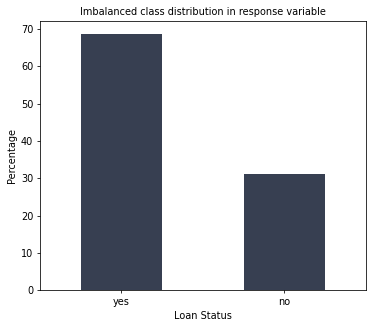

In [14]:
# Response variable - loan_status

# visualization
(train_data['loan_status'].value_counts() * 100 / len(train_data)).plot(kind='bar')

# labels
plt.xlabel("Loan Status", size=10)
plt.ylabel("Percentage", size=10)
plt.title("Imbalanced class distribution in response variable", size=10)

plt.xticks(ticks=[0, 1], labels=['yes', 'no'], rotation=0)
plt.show()

In [15]:
# Correlation analysis
def compute_chi2(column):
    """
    compute_corr(column1):
        function to compute the correlation between the categorical variable and response variale(y)
    
    """
    threshold = 0.05
    ct = pd.crosstab(train_data[column], train_data['loan_status'])    
    result = stats.chi2_contingency(ct)
    
    p_value = result[1]
    
    if p_value < threshold:
        return "P-value=%f; The null hypothesis is rejected; %s & loan_status are dependent" % (p_value, column)
    return "P-value=%f; The null hypothesis is accepted; %s & loan_status are not dependent" % (p_value, column)


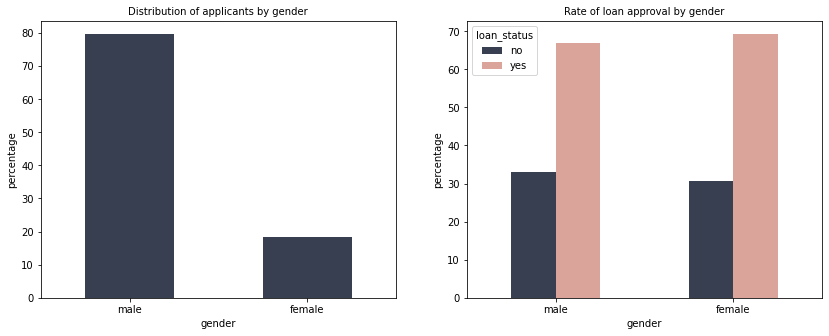

In [16]:
# Gender 
"""Let's find if the `gender` of the applicant is matter in loan approval."""
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), dpi=72)

# Data preparation
a = train_data['gender'].value_counts() * 100 / len(train_data)  
b = train_data.groupby(by=['gender', 'loan_status']).count()['loan_id'] * 100 / train_data.groupby(by=['gender']).count()['loan_id']

# Visualizations
# plot-1
a.plot(kind='bar', ax=ax1) 

ax1.set_title("Distribution of applicants by gender", size=10)
ax1.set_xlabel("gender", size=10)
ax1.set_ylabel("percentage", size=10)

ax1.set_xticks(ticks=[0, 1], labels=['male', 'female'], rotation=0)

# plot-2
b.unstack().plot(kind='bar', ax=ax2)

ax2.set_title("Rate of loan approval by gender", size=10)
ax2.set_xlabel("gender", size=10)
ax2.set_ylabel("percentage", size=10)

ax2.legend(labels=['no', 'yes'], title='loan_status')
ax2.set_xticks(ticks=[0, 1], labels=['male', 'female'], rotation=0)

plt.show()

Above plot shows that, There is huge difference between the male and female applicant for loan. However, the second plot shows that, rate of accepting or rejecting the loan application for home is almost same for both male and female applicant, hence we can say that, the approval of loan does not depend on the gender of the applicant. Let's confirm this finding by performing hypothesis test. 

In [17]:
# Hypothesis test - 'Gender' vs. 'Loan status'
""" Let's perform a hypothesis test using chi square to find if the `gender` of the applicant is matter in loan approval.
    H0(null hypothesis): The gender of the applicant does not matter.
    H1(alternative hypothesis): The gender of the applicant is matter.
"""
compute_chi2('gender')

'P-value=0.708653; The null hypothesis is accepted; gender & loan_status are not dependent'

From the above hypothesis test, we can say that the acceptance or rejections of the loan of particular applicant does not depends on their gender.

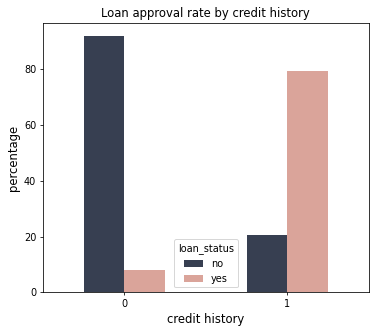

In [18]:
# Let's find the relation between credit history and loan status.
# data preparation
a = train_data.groupby(by=['credit_history', 'loan_status']).count()['loan_id']* 100 / train_data.groupby(by=['credit_history']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by credit history',size=12)
plt.xlabel('credit history', size=12)
plt.ylabel('percentage', size=12)

plt.xticks(ticks=[0, 1], labels=[0, 1], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

The above plot shows high rate of loan rejection for applicant with no credit history, and high rate of loan approval for applicant with credit history. We can say that, there is higher chances for loan rejection if an applicant does not have a credit history as compare to the applicant with credit history.

So, we can say that, loan approval is depends on applicant's credit history. Again, we can confirm this finding by computing the chi square hypothesis test.

In [19]:
# Hypothesis test - 'Credit history' vs. 'Loan status'
"""Let's find out if there is any dependency between credit-history and loan approval."""
compute_chi2('credit_history')

'P-value=0.000000; The null hypothesis is rejected; credit_history & loan_status are dependent'

From the above hypothesis test, we can say that loan approval depends on credit history.

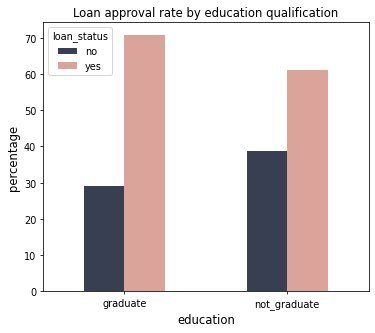

In [20]:
# Let's find the relation between education and loan status.
# data preparation
a = train_data.groupby(by=['education', 'loan_status']).count()['loan_id']* 100 / train_data.groupby(by=['education']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by education qualification',size=12)
plt.xlabel('education', size=12)
plt.ylabel('percentage', size=12)

plt.xticks(ticks=[0, 1], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

Above plot shows small difference for rejecting and accepting loan application by education of an applicant. However, The rate of approval for graduate applicant is higher than the non-graduate applicant. Let's find out if loan approval depends on education of an applicant by hypothesis test.

In [21]:
# Hypothesis test - 'Education' vs. 'Loan status'
""" Let's find out if there is any effect of educational background on loan approval. """
compute_chi2('education')

'P-value=0.043100; The null hypothesis is rejected; education & loan_status are dependent'

The above hypothesis test says that, loan approval depends on education of an applicant.

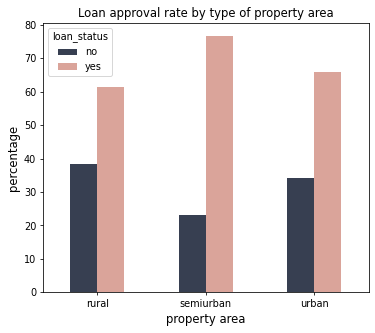

In [22]:
# property_area and loan status
# data preparation
a = train_data.groupby(by=['property_area', 'loan_status']).count()['loan_id']* 100 / train_data.groupby(by=['property_area']).count()['loan_id']

# plot
a.unstack().plot(kind='bar')

plt.title('Loan approval rate by type of property area',size=12)
plt.xlabel('property area', size=12)
plt.ylabel('percentage', size=12)

plt.xticks(ticks=[0, 1, 2], rotation=0)
plt.legend(labels=['no', 'yes'], title='loan_status')
plt.show()

We can see that, the home loan approval rate for `semi-urban` property area is higher than other two property areas. 

In [23]:
# Correation between for categorical variables and loan status
scores = []
label = 'loan_status'
for col in categorical_cols[:-1]:
    threshold = 0.05
    ct = pd.crosstab(train_data[col], train_data[label])    
    result = stats.chi2_contingency(ct)
    scores.append((label, col, result[0], round(result[1], 5)))    

In [24]:
corr_df = pd.DataFrame(scores, columns=['target', 'cat_feature', 'chi2_stats', 'p-value'])
corr_df.style.highlight_between(subset=['chi2_stats', 'p-value'], left=-1, right=0.05, color='skyblue')

,target,cat_feature,chi2_stats,p-value
0,loan_status,gender,0.139626,0.708650
1,loan_status,married,4.475019,0.034390
2,loan_status,dependents,3.158340,0.367850
3,loan_status,education,4.091490,0.043100
4,loan_status,self_employed,0.000000,1.000000
5,loan_status,credit_history,174.637297,0.000000
6,loan_status,property_area,12.297623,0.002140


In [25]:
# Discriptive analysis for numerical variable
subsets = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
yes_d = round(train_data.loc[train_data.loan_status=='y', subsets].describe(), 2)
no_d = round(train_data.loc[train_data.loan_status=='n', subsets].describe(), 2)

pd.concat([yes_d, no_d], keys=["Loan status-yes", "Loan status-No"], axis=1)

Loan status-yes                                                  \
      applicant_income coapplicant_income loan_amount loan_amount_term   
count           422.00             422.00      411.00           414.00   
mean           5384.07            1504.52      144.29           341.07   
std            5765.44            1924.75       85.48            63.25   
min             210.00               0.00       17.00            12.00   
25%            2877.50               0.00      100.00           360.00   
50%            3812.50            1239.50      126.00           360.00   
75%            5771.50            2297.25      161.00           360.00   
max           63337.00           20000.00      700.00           480.00   

        Loan status-No                                                  
      applicant_income coapplicant_income loan_amount loan_amount_term  
count           192.00             192.00      181.00           186.00  
mean           5446.08            1877.81      151.22           344.06  
std            6819.56            4384.06       85.86            69.24  
min             150.00               0.00        9.00            36.00  
25%            2885.00               0.00      100.00           360.00  
50%            3833.50             268.00      129.00           360.00  
75%            5861.25            2273.75      176.00           360.00  
max           81000.00           41667.00      570.00           480.00

The above table shows us the descriptive summary for attribute subset by loan status. Applicant and Co-applicant income mean seems to be same for both the status.

Let's further evaluate our findings using one-way ANOVA hypothesis test.

In [26]:
# One way ANOVA hypothesis test.
"""
    Let's compute the one way anova hypothesis test,
    H0: The mean group of each category of loan status('y', 'n') is same.
    H1: There is difference between these two group means.
"""
f_stats, p_value = stats.f_oneway(train_data[train_data.loan_status == 'y']['applicant_income'], 
                                  train_data[train_data.loan_status=='n']['applicant_income'])

print("ANOVA hypothesis test::")
print("F_statistics::", f_stats)
print("P-value::", p_value)

ANOVA hypothesis test::
F_statistics:: 0.013574218522301743
P-value:: 0.907287812130378


The above ANOVA test results of loan status has p-value which is greater than 0.05, which fail to reject the null hypothesis. This tells us that there is no statistically significant difference in means of loan status classes.

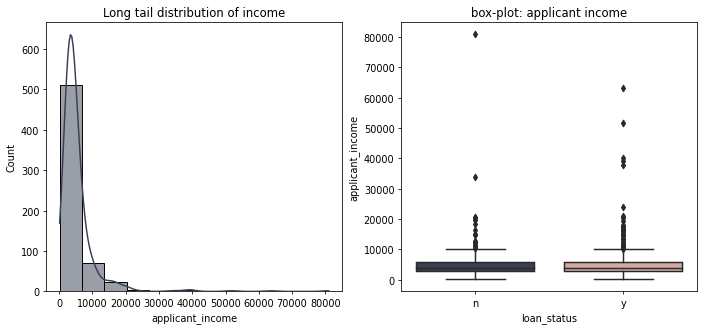

In [27]:
# applicant income
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data=train_data, x='applicant_income', bins=12, kde=True, ax=ax1)
ax1.set_title("Long tail distribution of income", size=12)

sns.boxplot(data=train_data, y='applicant_income', x='loan_status', ax=ax2)
ax2.set_title("box-plot: applicant income")
plt.show()

The above plot shows the long tail distribution for applicant income. It seems like there are some outliers present in the data. The above box plot shows, the average income of applicant for both loan status is same. 

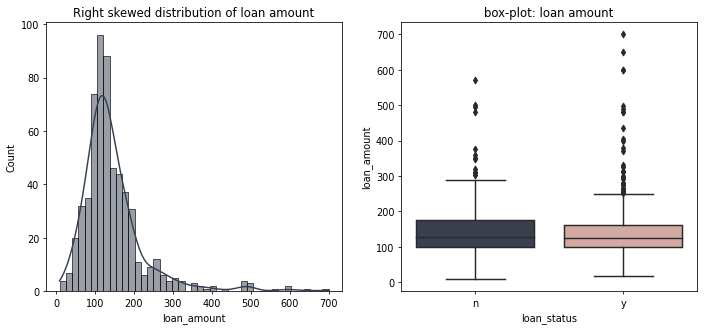

In [28]:
# coapplicant income
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data=train_data, x='loan_amount', kde=True, ax=ax1)
ax1.set_title("Right skewed distribution of loan amount", size=12)

sns.boxplot(data=train_data, y='loan_amount', x='loan_status', ax=ax2)
ax2.set_title("box-plot: loan amount")
plt.show()

We can that the there is right skewed distribution of `loan amount` and this box plot also shows that there is no difference between means of loan amount for both classes.

In [29]:
# Statistical description
train_data[subsets].corr().style.background_gradient(axis=0)

,applicant_income,coapplicant_income,loan_amount,loan_amount_term
applicant_income,1.000000,-0.116605,0.570909,-0.045306
coapplicant_income,-0.116605,1.000000,0.188619,-0.059878
loan_amount,0.570909,0.188619,1.000000,0.039447
loan_amount_term,-0.045306,-0.059878,0.039447,1.000000


The above table shows the correlation between variables, the correlation between loan amount and incomes is high.

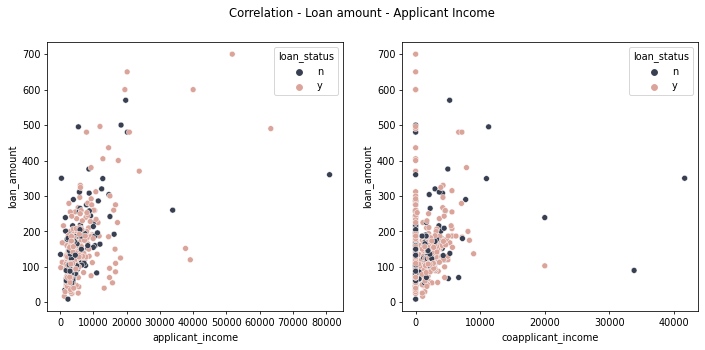

In [30]:
# Let's find out if there is linear relation between these two income variables with loan_amount.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(data=train_data, x='applicant_income', y='loan_amount', hue='loan_status', ax=ax1)
sns.scatterplot(data=train_data, x='coapplicant_income', y='loan_amount', hue='loan_status', ax=ax2)
fig.suptitle("Correlation - Loan amount - Applicant Income")
plt.show()

There is no linear relationship observed in incomes and loan amount.